# History's First Hypothesis Test
Python simulations for a blog article.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

ImportError: cannot import name 'axes' from 'matplotlib' (C:\Users\Riccardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\__init__.py)

In [7]:
!pip uninstall seaborn

In [2]:
df = pd.read_csv("arbuthnot.csv")

In [3]:
df.head()

,year,boys,girls
0,1629,5218,4683
1,1630,4858,4457
2,1631,4422,4102
3,1632,4994,4590
4,1633,5158,4839


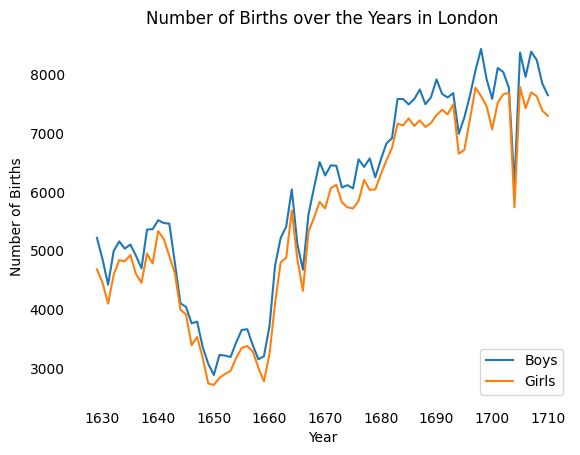

In [22]:
fig, ax = plt.subplots()
ax.plot(df['year'], df['boys'], color='')
ax.plot(df['year'], df['girls'], color='')
plt.title('Number of Births over the Years in London')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend(labels=['Boys', 'Girls'], loc='lower right')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
